***
***
# Programming for Data Analysis Project 
***
***

## Simulating a Data Set for a Real-world Phenomenon

## Fionn McCarthy

## Project Scope
The aim of this project is to create a data set by simulation of a real-world phenomenon of choice. This jupyter notebook will detail the research and investigation into this real-world phenomenon and how the different variables in the data set relate to each and how they are derived. 

I will carry out research into variables of interest in this area and utilize the different libraries and functions available in python in order to create the dataset. For the purpose of this project I wanted to simulate the real-world phenomenon of emergency department data, I have a backgroud in healthcare and I think it would be interesting to simulate data based on the emergency department. I decided to explore many different variables for the simulation of this dataset. I aim to generate a dataset that will show a patients record for admission (yes/no), whether patient did not wait to be seen, triage category, patient wait times (total time in the emergency department), arrival by ambulance, source of referral, patient gender and patients age. 

![xplotoutput](images/ed.jpg)

In Ireland Emergency Departments bear a constant headline in the news on a daily basis, this is prior to the current COVID-19 pandemic and has also been a constant presence throughout the pandemic and it appears to be an issue that may seem to be in the public health sector for quite some time in our future. I found an annual review from UL Hospitals Group available online for 2019 which detailed some figures around the emergency department, the Emergency Department at UHL in Limerick had on average of 195 patients per day over the course of 2019 with a total of 71,315 patients presenting in 2019(https://healthservice.hse.ie/filelibrary/ulh/ul-hospitals-group-annual-review-2019.pdf). UL Hospitals Group is a Public Acute Hospital Acute catering for the mid-west region of Ireland catering for a population of approximately 473,000 people across Clare, Limerick and North Tipperary(https://healthservice.hse.ie/healthcare-delivery/ul-hospitals-group/about-ul-hospitals-group/about-ul-hospitals-group.html). I will generate a dataset containing data based off one day of hospital emergency department attendances. 
***
***

# Variables of Interest
***
## Admission (yes/no)
I decided the most interesting variable from the emergency department was whether the patient was admitted as an inpatient or not, as generally whether or not the patient needed to be admitted as an inpatient would be determined by how ill the patient would be when attending the emergency department along with other patient characteristics. I will use the other information on the patients attendance in order to generate this variable. 

If a patient can be treated at the emergency department and then be sent home again once treated then they will not require admission as an inpatient, an inpatient is a patient that requires an overnight stay on the hospital ward. The hospital ward is a separate section in the hospital to the emergency department. The decision on whether to admit the patient or not would come down to the Senior Emergency Department Consultants with the advice of their team.

An analysis of patient characterisitcs at four Irish teaching hospitals in the Dublin area showed that around one in four patients are admitted as inpatients from emergency departments (https://www.lenus.ie/bitstream/handle/10147/296824/CharacteristicsEDAttendances.pdf?sequence=1). 

The study looks at variables that inlfuence admissions, I will investigate these variables below. I will then utilize these avriables to create the variabble of interest, whetehr or not the patient was admitted.
***
***

# Influential Variables
***
## 1. Patient Age
In a study conducted in four Irish teaching hospitals in Dublin it was shown that patients in an age category of 15 to 24 years old are seven times less likely to be admitted than patients in the 85 and over category https://www.lenus.ie/bitstream/handle/10147/296824/CharacteristicsEDAttendances.pdf?sequence=1. Therefore this variable would have a significant effect on our variable of interest, whether or not the patient was admitted. The older the age of the patient seems to mean an increase risk in hospital admission.  

The variable patient age is the age of the patient at the time of registration to the emergency department. There age of patients attending an emergency department will depend on age cohorts of patients in that particular region. In 2019 the Department of Health prepared a paper called 'Health in Ireland' where it provides summary information on health and healthcare in Ireland over the previous ten years https://assets.gov.ie/45117/6a4f970018d6477bac38f4539f80e927.pdf. The population characteristics presenetd in this publication are based off the 2016 cencus and projections are made for figures for the 2019 year. The below image derives the population distributions across Ireland for 2019: 

![xplotoutput](images/population.png)

I will utilize the above information in order to simulate the age demographic of each patient within the dataset. I will uniformly distribute the age of each patient between each age category. 

Text(0, 0.5, 'Frequency')

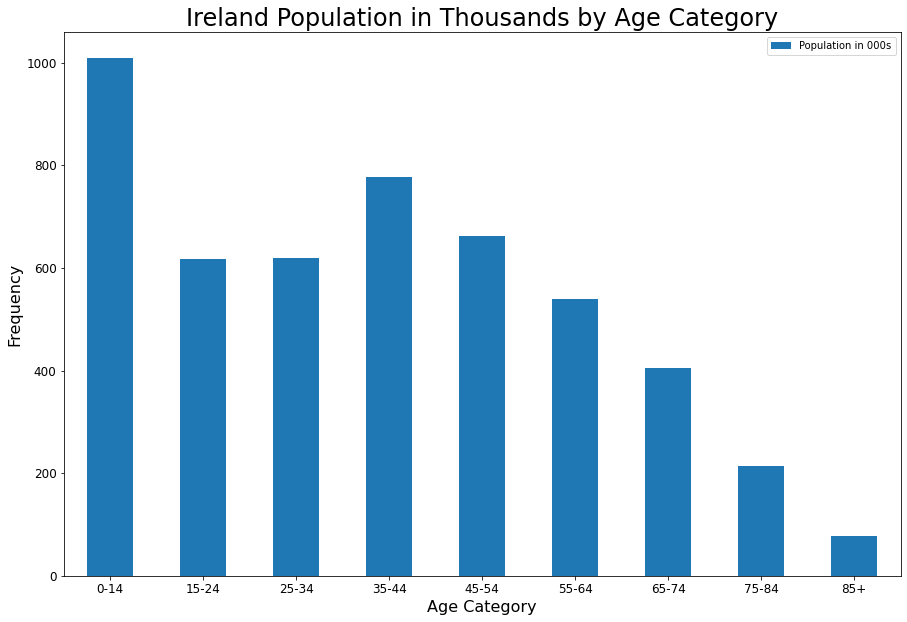

In [1]:
# https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/
# import pandas as pd
import pandas as pd

# list of age groups
age = ['0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']

# list of populations in 000's
population = [1008.9, 618.0, 620.0, 776.9, 661.6, 539.7, 404.1, 214.9, 77.3]

# sum population 
population_total = 1008.9 + 618.0 + 620.0 + 776.9 + 661.6 + 539.7 + 404.1 + 214.9 + 77.3

#  create array of population percent 
population_percent = [(i / population_total)*100 for i in population]

#creating pandas dataframe
df = pd.DataFrame(list(zip(age, population, population_percent)), columns =['Age_Cat', 'Population in 000s', 'Pop%'])
df

#font type set
font_1 = {'family':'sans-serif','color':'black','size':16} 
font_2 = {'family':'sans-serif','color':'black','size':24} 

#barplot of dataframe
ax = df.plot.bar(x='Age_Cat', y='Population in 000s', rot=0, figsize=(15, 10), fontsize=12)
ax.set_title("Ireland Population in Thousands by Age Category", fontdict=font_2)
ax.set_xlabel("Age Category", fontdict=font_1)
ax.set_ylabel("Frequency", fontdict=font_1)  

The above plot shows that the population in Ireland is positively skewed or also skewed to the right. 

In [2]:
df

,Age_Cat,Population in 000s,Pop%
0,0-14,1008.9,20.500264
1,15-24,618.0,12.557402
2,25-34,620.0,12.598041
3,35-44,776.9,15.786158
4,45-54,661.6,13.443329
5,55-64,539.7,10.966392
6,65-74,404.1,8.211078
7,75-84,214.9,4.366644
8,85+,77.3,1.570691


Given the above research I found it would be best to unifromly distribute the data beween each age bucket. I will use the percentage breakdown in each case to simulate the population sample. I will assume a max age of 100 for the purpose of this simulation. Therefore I will generate the data as follows:
* 20% between 0 and 14.
* 13% between 15 and 24.
* 13% between 25 and 34.
* 16% between 35 and 44.
* 13% between 45 and 54.
* 11% between 55 and 64.
* 8% between 65 and 74.
* 4% between 75 and 84.
* 2% between 85 and 100.

I will use the NumPy library in order to generate these randome integers between these ages categories and create a dataframe. 

In [3]:
import numpy as np

#set seed
rng = np.random.default_rng(2)

a = rng.integers(0,15, size=40)
b = rng.integers(15,25, size=26)
c = rng.integers(25,35, size=26)
d = rng.integers(35,45, size=32)
e = rng.integers(45,55, size=26)
f = rng.integers(55,65, size=22)
g = rng.integers(65,75, size=16)
h = rng.integers(75,85, size=8)
i = rng.integers(85,100, size=4)

age_a = pd.DataFrame(a,  columns=["age"])
age_b = pd.DataFrame(b,  columns=["age"])
age_c = pd.DataFrame(c,  columns=["age"])
age_d = pd.DataFrame(d,  columns=["age"])
age_e = pd.DataFrame(e,  columns=["age"])
age_f = pd.DataFrame(f,  columns=["age"])
age_g = pd.DataFrame(g,  columns=["age"])
age_h = pd.DataFrame(h,  columns=["age"])
age_i = pd.DataFrame(i,  columns=["age"])
#age_df

age_df = pd.concat([age_a, age_b, age_c, age_d, age_e, age_f, age_g, age_h, age_i], ignore_index=True)
age_df = age_df.sample(frac=1)
age_df

,age
13,2
93,40
26,10
4,6
162,62
...,...
183,69
34,13
6,6
75,30


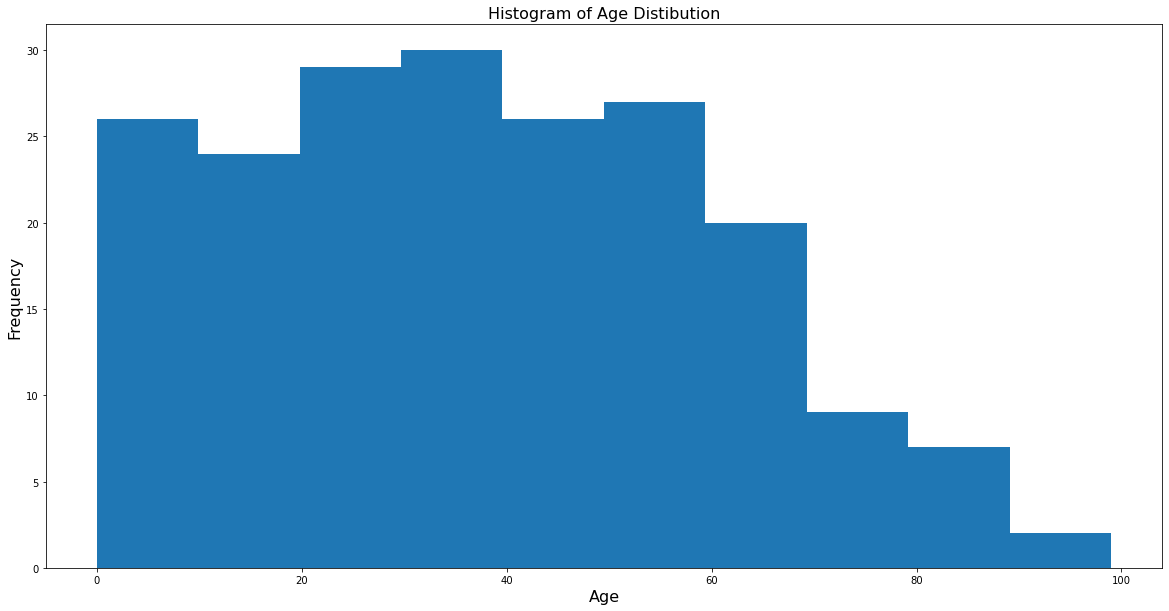

In [4]:
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(20,10))

font_1 = {'family':'sans-serif','color':'black','size':16} 

#plot histogram
plt.hist(age_df)

# adding title and labels
plt.title('Histogram of Age Distibution', fontdict = font_1)
plt.ylabel('Frequency', fontdict = font_1)
plt.xlabel('Age', fontdict = font_1)

# legend on plot
plt.show()

***
## 2. Triage Category 
In the study conducted in four Irish teaching hospitals in Dublin it was shown that patients triage category would have a significant impact on the patients outcome within the emergency department  https://www.lenus.ie/bitstream/handle/10147/296824/CharacteristicsEDAttendances.pdf?sequence=1. This would make sense as a triage nurse with clinical experience will be assigning each patient their urgnecy category and if a patient is more urgent it would generally mean their injury is more serious and then this would possibly lead to a higher risk of hospital admission. Therefore this variable would have a significant effect on our variable of interest, whether or not the patient was admitted. The lower the category (more urgent) appears to have an increase in likelihood of hospital admission. 

Triage category is the Manchester Triage Score system which is utilized across all Irish emergency departments, it enables the triage nurse (nurse who first assesses patient) to evaluate the urgency of the attendance to the emergency department. The triage nurse will assign a clinical priority to the patient upon evaluation whic is solely based off signs and sypmtoms and not from underlying conditions (https://www.hse.ie/eng/services/publications/clinical-strategy-and-programmes/infographic-emergency-medicine.pdf). 

* **Triage Category 1**: Patient needs immediate attention, often unconcious on arrival and is used in extreme cases(fatal).
* **Triage Category 2**: Patient requires very urgent care, often a very serious illness or injury and could be fatal. 
* **Triage Category 3**: Patient is categorized as urgent, has a relatively serious illness injury or illness.
* **Triage Category 4**: Patient is just a standard attendance, and is not categorized as urgent.  
* **Triage Category 5**: Pateint here is non-urgent, in most cases is an unneccessary attendance.

See image below for how it is categorized in Ireland https://www.hse.ie/eng/services/publications/clinical-strategy-and-programmes/infographic-emergency-medicine.pdf: 

![xplotoutput](images/triage.jpg)

The results of the study carried out in Dublin showed that triage category 4 and 5 patients have a very low likelihood of admission, a triage category 3 patient has an equal chance of admission where as a triage category 2 patient is four times more likely than a triage category 3 to be admitted. 

In order to simulate such a categorical varibale, I investigated what proportions of patients attended via each triage categories at other emergency departments around the world. A study on 'Agreement between triage category and patient’s perception of priority in emergency departments' was carried out on across eight emergency department's in Queensland in Australia shows the assigned triage categories for 406 pateints that were sampled. 0.2% were assigned triage category 1, 6.7% triage category 2, 33% triage category 3, 52.5% triage category 4 and 7.6% triage category 5 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5070359/. 

In [11]:
# list of triage categories
triage_cat = ['1', '2', '3', '4', '5']

# assigning probability of each triage category
triage_array = rng.choice(triage_cat, 200, p=[0.002, 0.067, 0.33, 0.525, 0.076])
triage_array

triage_df = pd.DataFrame(triage_array,  columns=["triage_category"])
triage_df

,triage_category
0,4
1,5
2,3
3,4
4,4
...,...
195,3
196,4
197,5
198,3


Text(0, 0.5, 'Frequency')

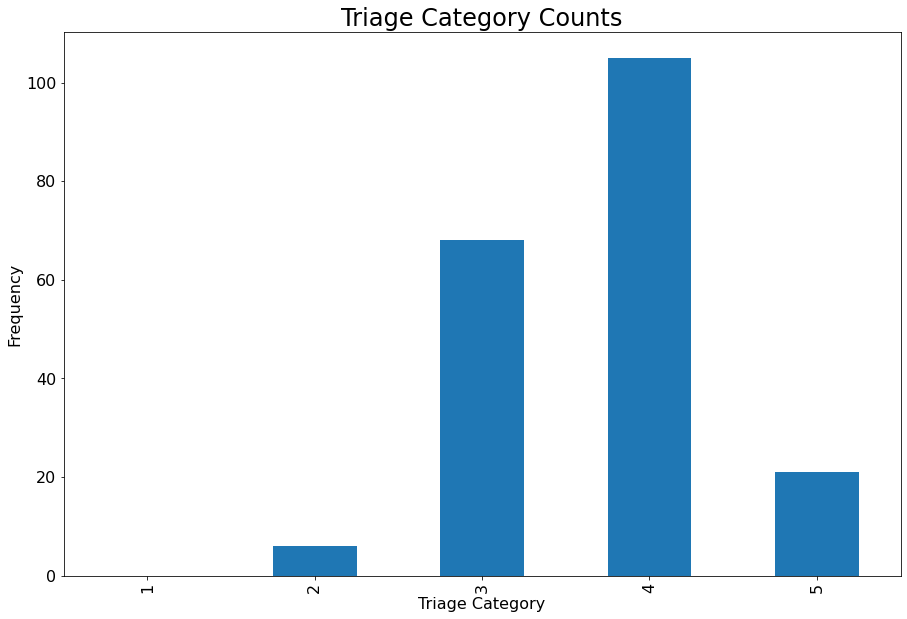

In [12]:
# https://stackoverflow.com/questions/65708947/change-x-axis-order-of-labels-in-pandas-matplotlib-histogram
#triage.triage_category.value_counts().loc[['1', '2', '3', '4', '5']].plot.bar()

#Previously I had teh above code but it was no longer supported as per https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
# changed to below from documentation
triage_plot = triage_df.triage_category.value_counts().reindex(['1', '2', '3', '4', '5']).plot.bar(figsize=(15, 10), fontsize=16)

# triage_plot title and labels
triage_plot.set_title("Triage Category Counts", fontdict=font_2)
triage_plot.set_xlabel("Triage Category", fontdict=font_1)
triage_plot.set_ylabel("Frequency", fontdict=font_1)  

In [7]:
# plt.style.use('ggplot')
# possible COVID???

***
## 3. Referral Source
The variable referral source has also been noted as a significant factor in the outcome of whether or not a patient is admitted as an inpatient from the emergecny department. In this case I will investigate two different types of referrals, self-referral or GP referral. 

* **GP Referral**: A GP referral is patient who has been seen by their own General Practitioner (GP) and their GP has obstructed them that they will need to attend the emergency department and they then write them a letter of referral for this attendance.
* **Self Referral**: A self referral is a patient that attends the Emergency Department without being previously seen by their GP, this could be a patient who has been brought in via ambulance or in fact has arrived via their own transport. 

![xplotoutput](images/gp_referral.png)
image: https://www.medicspot.co.uk/treatment/gp-referral 

In a study previously carried out around characteristics of emergency department attendnaces in the Dublin area, it was found that almost 79% of patients are self-referrers https://www.lenus.ie/bitstream/handle/10147/296824/CharacteristicsEDAttendances.pdf?sequence=1. Anotehr study carried out in a hospital in Amsterdam found that 26% of patwients arrived at teh emrgency department withoout referral https://intjem.biomedcentral.com/articles/10.1186/s12245-015-0096-x. With this statistic in mind I will generate a an array of referral source containing either 'GP' or 'Self' with a a probability of 0.775 that a pateitn is a self-referrer and the a probability of 0.225 that the patient has been referred form their GP.

I will use the numpy **choice()** function in order to generaate this data at random. I will then plot the counts of each in the corresponding bar chart. 

Text(0, 0.5, 'Frequency')

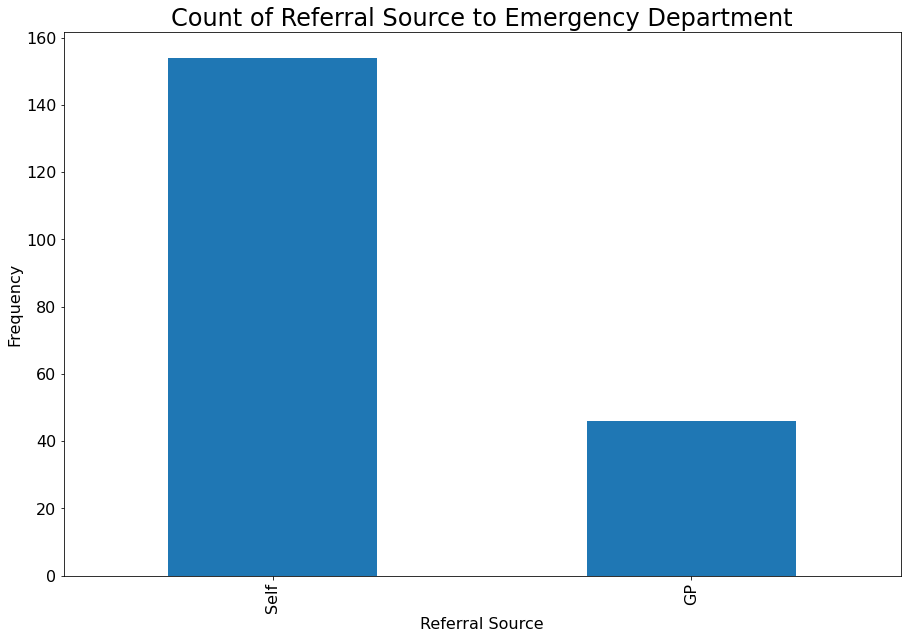

In [8]:
# list of referral types
referral = ['GP', 'Self']


# assigning probability of each triage category
referral_array = rng.choice(referral, 200, p=[0.225, 0.775])
referral_array

referral_df = pd.DataFrame(referral_array,  columns=["referral"])
referral_df

#referral_df['referral'].value_counts()

referral_plot = referral_df.referral.value_counts().reindex(['Self', 'GP']).plot.bar(figsize=(15, 10), fontsize=16)

# triage_plot title and labels
referral_plot.set_title("Count of Referral Source to Emergency Department", fontdict=font_2)
referral_plot.set_xlabel("Referral Source", fontdict=font_1)
referral_plot.set_ylabel("Frequency", fontdict=font_1)

***
## 4. Model of Arrival
Another variable that would have an influence on patient admission would be that of the mode of arrival in which the patient was brought to the hospital, in most cases people are trasnported to the emergency department by a family meember or some other type of transport but it is a common occurance for a patient to be brought in via ambulance. At a first glance i would think if you were to need an ambulance you would generally be in more urgent need of care. I carried out some research into the figures and avergares in different areas in relation to ambulances and emergency departments. 

![xplotoutput](images/ambulance.jpg)
image https://en.wikipedia.org/wiki/Ambulance

In two studdies carried out in the United States of America, the first study found there to be 14.4% of all patients who arrived at the emergency departmwent to be brought in via ambulance https://pubmed.ncbi.nlm.nih.gov/16997771/ and the second study carried out found that 14.2% of all attendances were brought in via ambulance https://www.researchgate.net/publication/7231555_Analysis_of_Ambulance_Transports_and_Diversions_Among_US_Emergency_Departments. 

In a study carried out in England in relation to factors that inlfuence admission in hospitals it was found that from all admissions to 140 hospitals between April 2013 and February 2014, 61.5% of these admissions were found to be brought in via ambulance https://qualitysafety.bmj.com/content/qhc/26/8/613.full.pdf. In the study I mentioned above carried out in the US, it was calculated that of these 14.2% of patients brought in via ambulance then 37% of these then result in an admission https://www.researchgate.net/publication/7231555_Analysis_of_Ambulance_Transports_and_Diversions_Among_US_Emergency_Departments. This shows how much of a role this variable plays in risk of emergency department admissions for this data set. 

Given the above researched articles I will utilize the statistic that anywhere between 11% and 18% of patients arriving at the ambulance will arrive via ambulance, it must also be noted that a person who arrives via ambulance must not be a GP referral and will not fall into the category 4 or category 5 of triage due to these patients not being classified as urgent. For the purpose of this project i will utilized this rationale due to an ambulance generally being used in cases of emergency. 

***
***
# Simulating the Data
I will use the research conducted to create this data. First I will combine age and triage category 


In [9]:
age_df

,age
13,2
93,40
26,10
4,6
162,62
...,...
183,69
34,13
6,6
75,30


In [13]:
triage_df

,triage_category
0,4
1,5
2,3
3,4
4,4
...,...
195,3
196,4
197,5
198,3


In [15]:
df = age_df.join(triage_df)
df

,age,triage_category
13,2,3
93,40,3
26,10,4
4,6,4
162,62,3
...,...,...
183,69,4
34,13,4
6,6,5
75,30,4


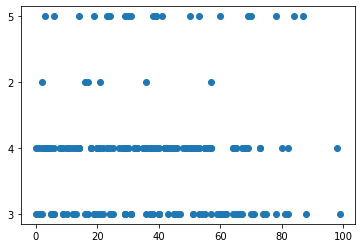

In [17]:
plt.scatter(df['age'], df['triage_category'])

Relationship between variables eg 
pet and age have posititive linear rel https://imj.ie/growing-old-in-the-emergency-department/
lower

ambulance
https://www.esri.ie/system/files/publications/QEC2020SUM_SA_lyons.pdf
14.2% https://www.researchgate.net/publication/7231555_Analysis_of_Ambulance_Transports_and_Diversions_Among_US_Emergency_Departments
14.4% https://pubmed.ncbi.nlm.nih.gov/16997771/

PET compliance https://www.imo.ie/news-media/publications/Compliance-PP.pdf 

https://www.lenus.ie/bitstream/handle/10147/296824/CharacteristicsEDAttendances.pdf?sequence=1 - Characteristics of emergency departments attendances in four Irish teaching hospitals

